In [20]:
import matplotlib.pyplot as plt
import srt_util
import PhysicsTool as pt
pt.plotting.set_theme()

In [21]:
NR_SAMPLES = 361

In [22]:
def plot_elevation_scan(file_path):
    with srt_util.SRT_HDF_Reader(file_path) as srt_reader:
        pos = srt_reader.get_object_positions()
        spec = srt_reader.get_power_spectrum()[0:NR_SAMPLES]
        print('Start of measurement: ', srt_reader.get_time()[0])
        print('End of measurement: ', srt_reader.get_time()[-1])
    azimut = int(pos['Azimuth'][0])
    freq_range = srt_util.SPECTRUM_WIDTH
    plt.ylim(77, 111)
    plt.scatter(pos['Elevation'][0:NR_SAMPLES], spec.sum(axis=1)*freq_range, label = f'Azimut = {azimut}°', marker='.')

In [23]:
def plot_power_spectrum(file_path: str, idx: int):
    with srt_util.SRT_HDF_Reader(file_path) as srt_reader:
        spec = srt_reader.get_power_spectrum()[idx]
        elevation = srt_reader.get_object_positions()['Elevation'][idx]
        azimut = srt_reader.get_object_positions()['Azimuth'][idx]
        plt.ylim(0.2e-7,1.65e-7)
        plt.plot(srt_util.SPECTROMETER_FREQUENCIES / 1e6, spec, label = f'Azimuth = {azimut}°, Elevation = {elevation}°')
        plt.xticks(srt_util.SPECTROMETER_TICKS / 1e6)

In [24]:
path_n_90 = 'Measurements/ElevationScan/ElevationScan_T2150_Az90_20251007.hdf'
path_n_180 = 'Measurements/ElevationScan/ElevationScan_T2205_Az180_20251007.hdf'
path_d_90 = 'Measurements/ElevationScan/2ndScanAtDay_noMilkyWay/ElevationScan_T1135_Az90_20251008.hdf'
path_d_180 = 'Measurements/ElevationScan/2ndScanAtDay_noMilkyWay/ElevationScan_T1100_Az180_20251008_use_lower_half_idx.hdf'

Start of measurement:  2025-10-07T19:51:49
End of measurement:  2025-10-07T20:04:40
Start of measurement:  2025-10-07T20:06:58
End of measurement:  2025-10-07T20:19:49


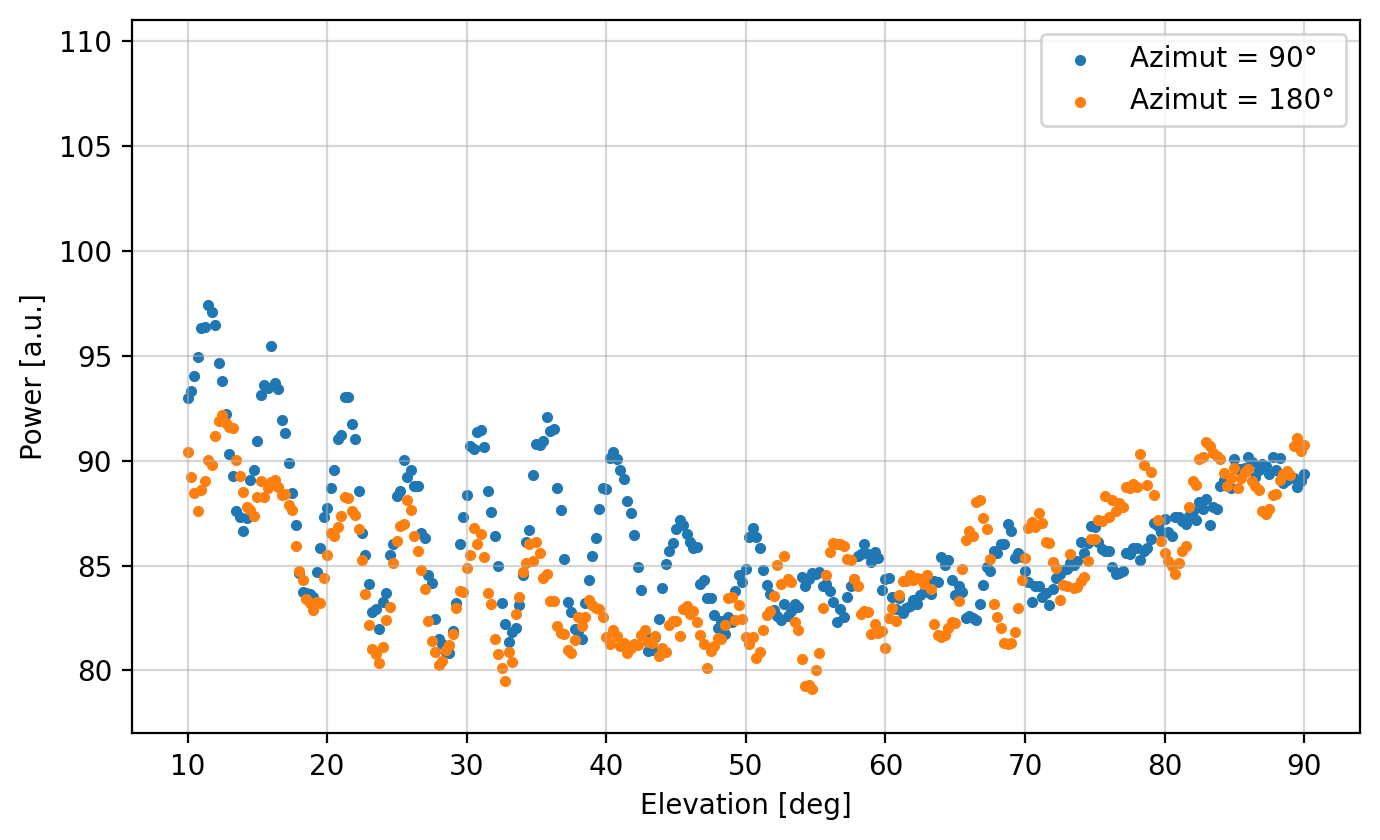

In [25]:
pt.plotting.set_up_plot(None, 'Elevation [deg]', 'Power [a.u.]')
plot_elevation_scan(path_n_90)
plot_elevation_scan(path_n_180)
plt.legend()
plt.savefig('srt_report/assets/elev_scan_night.png')
plt.show()

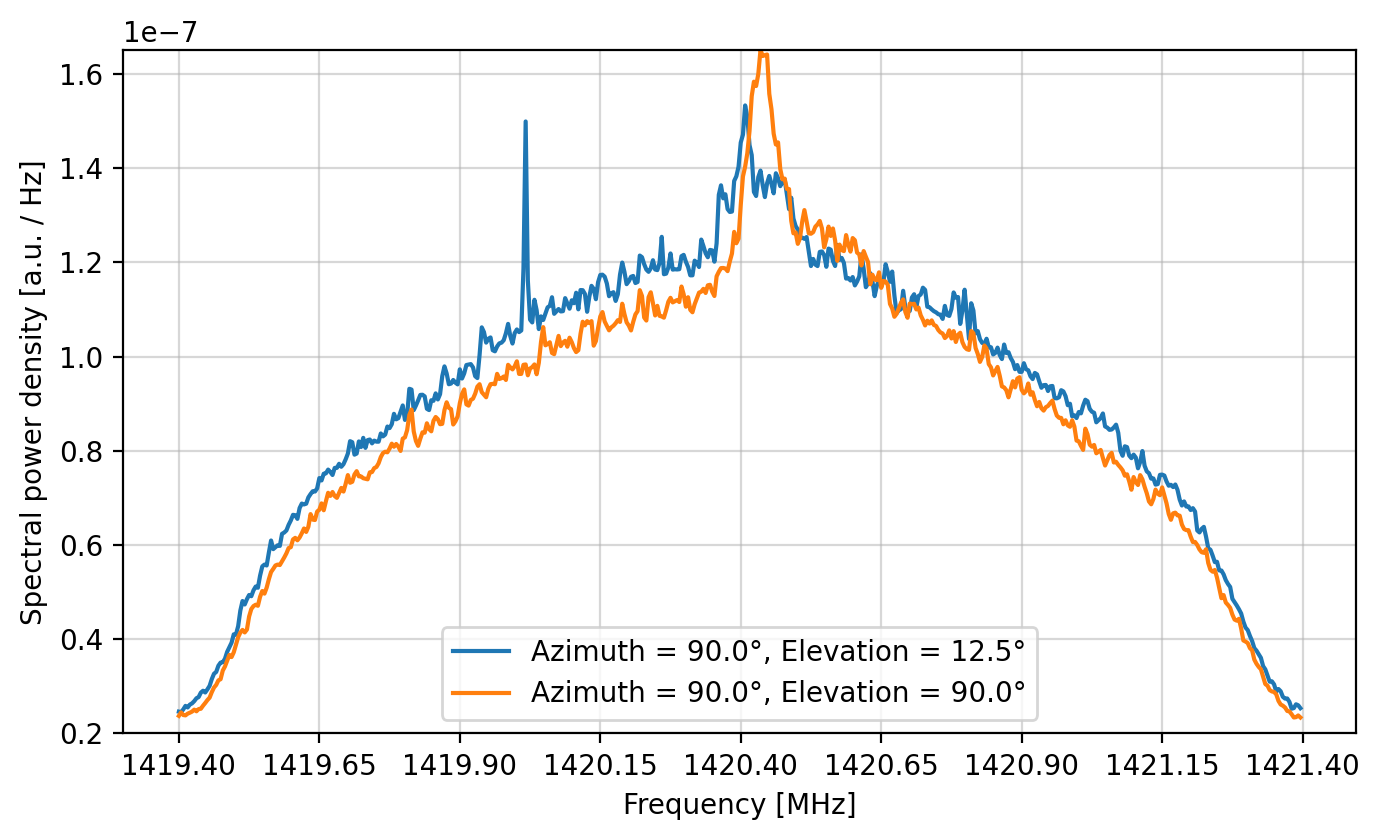

In [26]:
pt.plotting.set_up_plot(None, 'Frequency [MHz]', 'Spectral power density [a.u. / Hz]')
plot_power_spectrum(path_n_90, 10)
plot_power_spectrum(path_n_90, -1)
plt.legend()
plt.savefig('srt_report/assets/elev_spectrum_night.png')
plt.show()

the spike is likely the milkiway, therefore perform another scan at a diffrent time, to compare

Start of measurement:  2025-10-08T10:35:24
End of measurement:  2025-10-08T10:48:10
Start of measurement:  2025-10-08T10:02:32
End of measurement:  2025-10-08T10:28:30


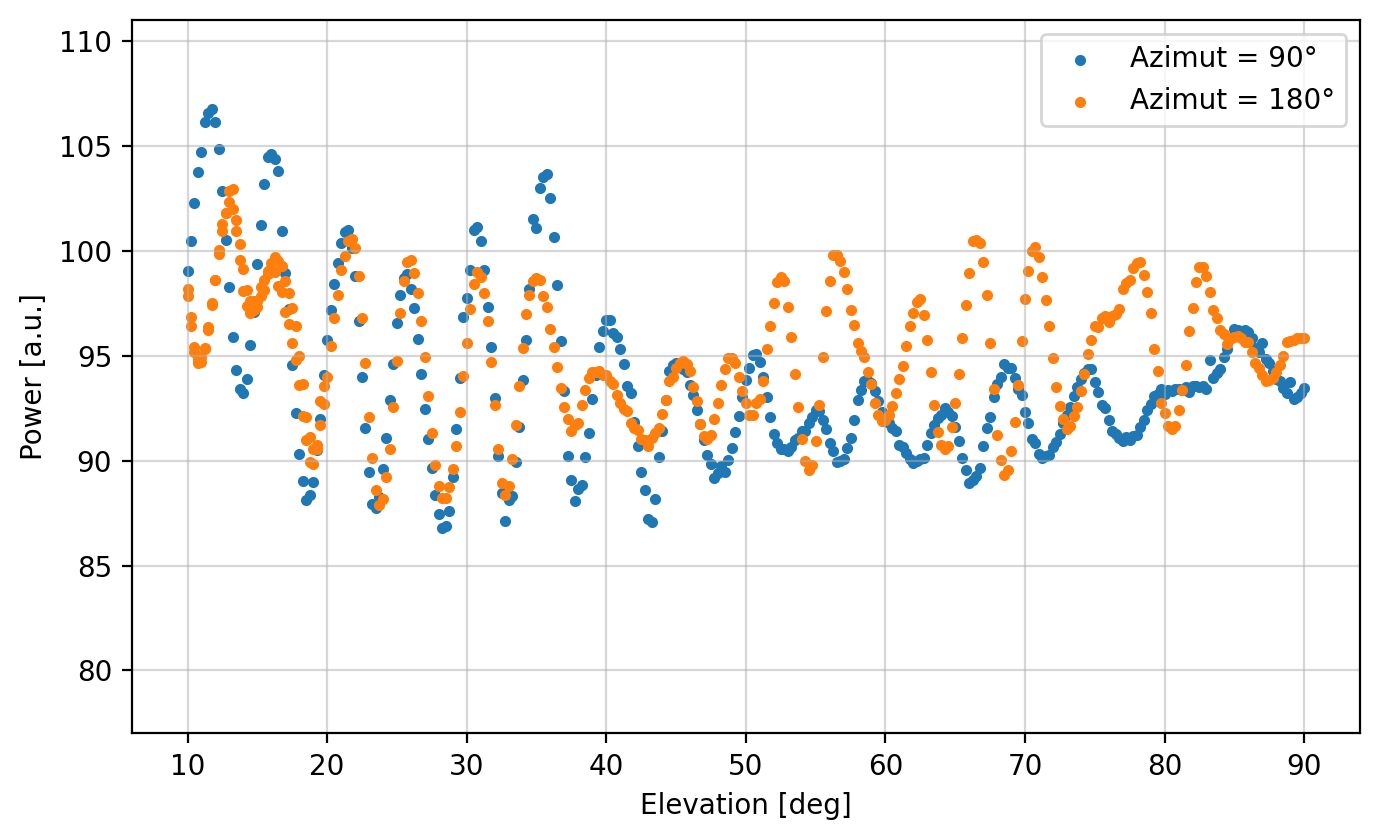

In [27]:
pt.plotting.set_up_plot(None, 'Elevation [deg]', 'Power [a.u.]')
plot_elevation_scan(path_d_90)
plot_elevation_scan(path_d_180)
plt.legend()
plt.savefig('srt_report/assets/elev_scan_day.png')
plt.show()

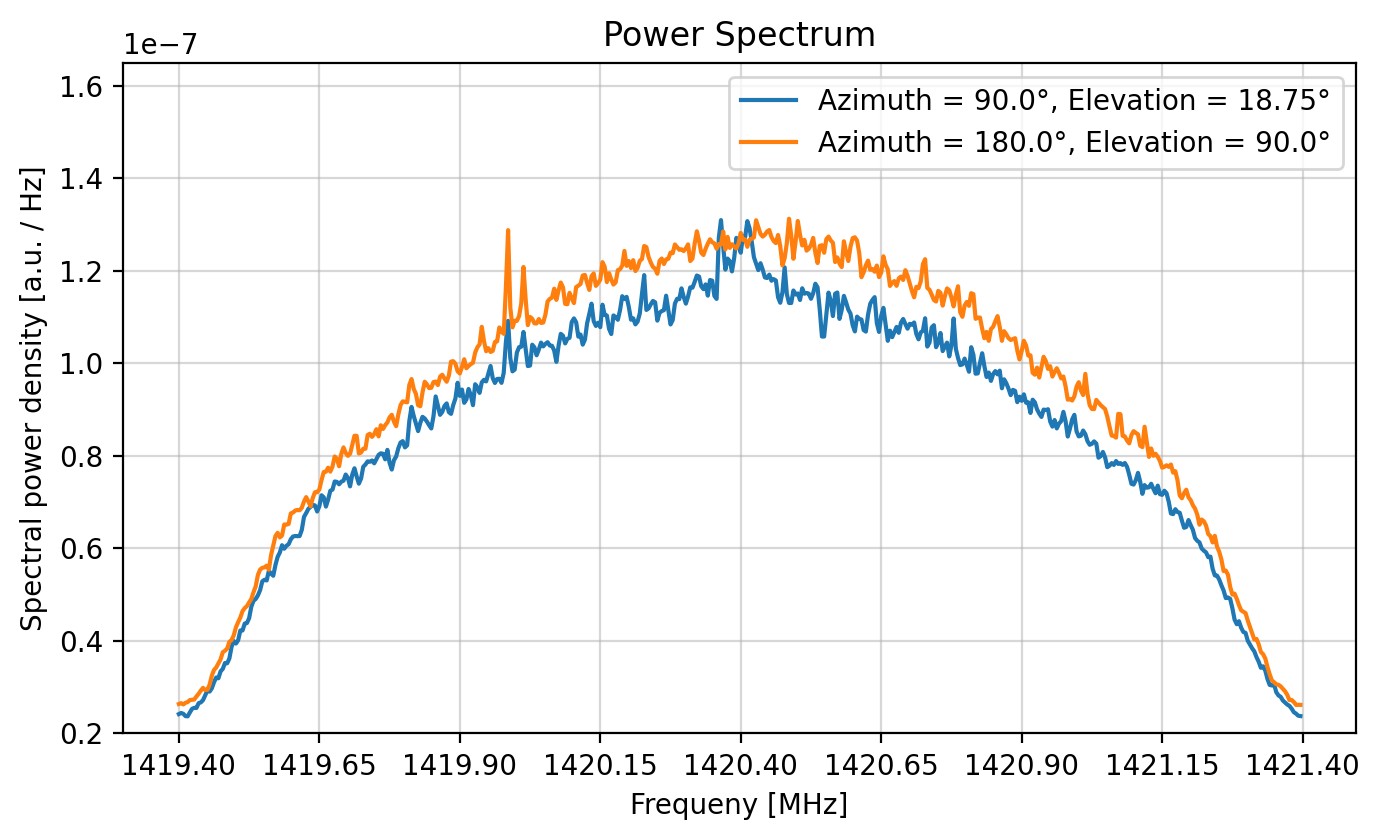

In [28]:
pt.plotting.set_up_plot(f'Power Spectrum', 'Frequeny [MHz]', 'Spectral power density [a.u. / Hz]')
plot_power_spectrum(path_d_90, 35)
plot_power_spectrum(path_d_180, -1)
plt.legend()
plt.savefig('srt_report/assets/elev_spectrum_day.png')
plt.show()